#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

## EXPERIMENT 4 - Task 1

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
# set seed for reproducibility
#np.random.seed(0)

1.	Define two Numpy arrays x and y   which represents BMI and Cholesterol
x= [5,15,25,35,45,55] and y= [11,16,18,30,22,38]

In [ ]:
x= np.array([5,15,25,35,45,55])
y= np.array([11,16,18,30,22,38])

2.	Plot a scatter plot of x and y.

Text(0.5, 1.0, 'Scatter plot')

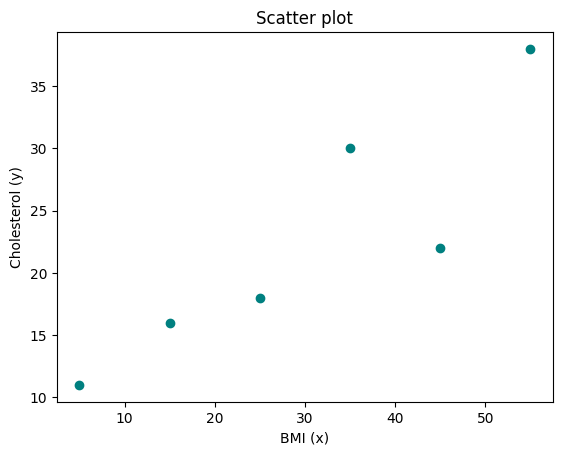

In [ ]:
# plotting scatter plot
plt.scatter(x,y,c='teal')
plt.xlabel('BMI (x)')
plt.ylabel('Cholesterol (y)')
plt.title('Scatter plot')

3.	Write a python function to compute the values of the coefficients of linear regression, b0 and b1.

In [ ]:
x_bar = np.mean(x)
y_bar = np.mean(y)

x_diff = np.array([])
y_diff = np.array([])
x_sq = np.array([])
mult = np.array([])

for i in range(np.size(x)):
  x_diff = np.append(x_diff, (x[i]-x_bar))
  y_diff = np.append(y_diff, (y[i]-y_bar))

for i in range(np.size(x_diff)):
  mult = np.append(mult, (x_diff[i]*y_diff[i]))

x_sq = np.square(x_diff)

b1 = np.sum(mult)/np.sum(x_sq)
print("b1: ", b1)
b0 = (y_bar)-(b1*x_bar)
print("b0: ", b0)

print("\nx-mean: ", x_bar)
print("y-mean: ", y_bar)
print("xi-x_bar: ", x_diff)
print("yi-y_bar: ", y_diff)
print("(xi-x_bar)^2: ", x_sq)
print("mult: ", mult)

b1:  0.4714285714285714
b0:  8.357142857142858

x-mean:  30.0
y-mean:  22.5
xi-x_bar:  [-25. -15.  -5.   5.  15.  25.]
yi-y_bar:  [-11.5  -6.5  -4.5   7.5  -0.5  15.5]
(xi-x_bar)^2:  [625. 225.  25.  25. 225. 625.]
mult:  [287.5  97.5  22.5  37.5  -7.5 387.5]


4.	Determine the predicted value of y for x=27.

In [ ]:
y_pred = y-(b0 + (b1*27))
print('Predicted value of y for x=27:', y_pred)

Predicted value of y for x=27: [-10.08571429  -5.08571429  -3.08571429   8.91428571   0.91428571
  16.91428571]


5.	Plot the regression line on the scatter plot.

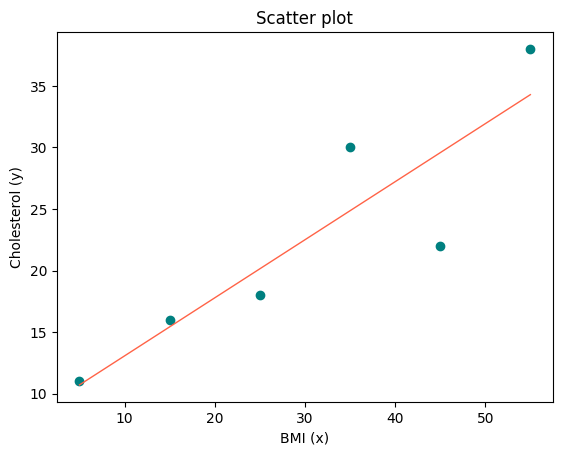

In [ ]:
plt.scatter(x,y,c='teal')
plt.xlabel('BMI (x)')
plt.ylabel('Cholesterol (y)')
plt.title('Scatter plot')
plt.plot(x, b0+(b1*x), color='tomato',linewidth=1)
plt.show()

6.	Write a python function to determine the value of r2.

In [ ]:
y_sq = np.square(y_diff) # (yi-y_bar)square
SST = np.sum(y_sq)
SSE = np.sum(np.square(y-(b0+(b1*x))))

r2 = (SST-SSE)/SST
print("R square= ",r2)

R square=  0.7913094027030954


## EXPERIMENT 4 - Task 2

1.	Import LinearRegression from SKlearn.

In [ ]:
from sklearn.linear_model import LinearRegression

2.	Reshape x to make it two dimensional array.

In [ ]:
x.shape

(6,)

In [ ]:
x_new = x[:,np.newaxis]
x_new.shape

(6, 1)

In [ ]:
y_new = y[:,np.newaxis]
y_new.shape

(6, 1)

3.	Create a model for linear regression.

In [ ]:
model = LinearRegression()

4.	Train the model using model.fit

In [ ]:
model.fit(x_new, y_new)

LinearRegression()

5.	Determine the value of intercept (b0) and slope(b1). Compare the values as obtained from task 1.

In [ ]:
#print("Regression coef: ",model.coef_) # b1
#print("Regression intercept: ",model.intercept_) # b0

b0_new = model.intercept_
print("Regression intercept:", b0_new)
print("b0 OG: ", b0)
b1_new = model.coef_
print("Regression coef:", b1_new)
print("b1 OG: ", b1)

Regression intercept: [8.35714286]
b0 OG:  8.357142857142858
Regression coef: [[0.47142857]]
b1 OG:  0.4714285714285714


In [ ]:
BMI_1 = np.array([27])
model.predict(BMI_1[:,np.newaxis])

array([[21.08571429]])

6.	Determine the value of r2. Compare the value with the one obtained in task 1.

In [ ]:
r2_new = model.score(x_new, y_new)
print("OG R-square ", r2)
print("R-square: ", r2_new)

OG R-square  0.7913094027030954
R-square:  0.7913094027030955


## EXPERIMENT 4 - Task 3

1.	Import salary.csv into your notebooks.

In [ ]:
df = pd.read_csv('Salary_Data.csv')

2.	Explore the dataset using head and describe.

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


3.	Repeat steps 2 to 6 from task 2.

In [ ]:
x= df['YearsExperience']
y= df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# test_size = 0.2 meand 80% is train data and 20% becomes test data
# if we don't write random_split=0, it is going to randomly split the data

In [ ]:
x_train.shape

(24,)

In [ ]:
y_train.shape

(24,)

In [ ]:
# currently x_train and y_train are in form of data frame. model will take arrays
x_train = np.array([x_train])
y_train = np.array([y_train])
# similarly, converting test data
x_test = np.array([x_test])
y_test = np.array([y_test])

In [ ]:
x_train.shape

(1, 24)

In [ ]:
y_train.shape

(1, 24)

In [ ]:
# converting test and train to 2D because model takes input as 24 rows and 1 col
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = x_test.reshape(-1,1)

In [ ]:
x_train.shape

(24, 1)

In [ ]:
y_train.shape

(24, 1)

In [ ]:
#import numpy as np
#from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# calc coeff from training dataset
reg.fit(x_train, y_train)
print(reg.coef_) # b1
print(reg.intercept_) # b0

[[9312.57512673]]
[26780.09915063]


<function matplotlib.pyplot.show(close=None, block=None)>

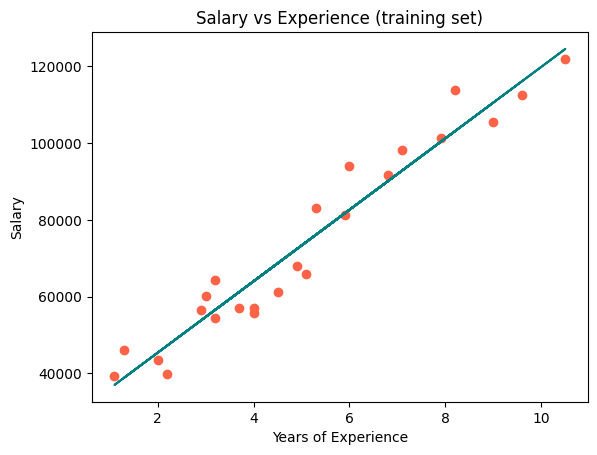

In [ ]:
# Visualizing the training set
plt.scatter(x_train, y_train, color='tomato')
plt.plot(x_train, reg.predict(x_train), color='teal')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show

In [ ]:
# predicting the test set results
y_pred = reg.predict(x_test)
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

<function matplotlib.pyplot.show(close=None, block=None)>

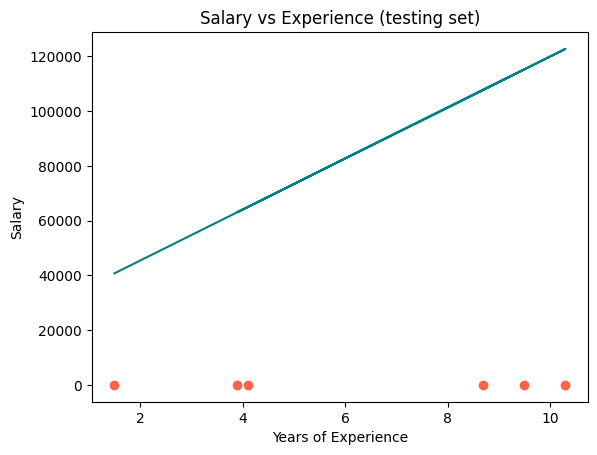

In [ ]:
# Visualizing the test set
plt.scatter(x_test, y_test, color='tomato')
plt.plot(x_test, reg.predict(x_test), color='teal')
plt.title('Salary vs Experience (testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show

In [ ]:
from sklearn.metrics import r2_score
r2_new1 = r2_score(y_test, y_pred)
print(r2_new1)

-758953508.5010419


4.	Plot a scatter plot of work experience vs salary

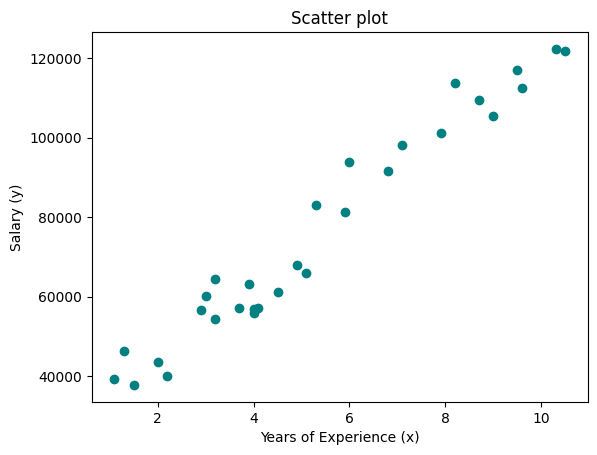

In [ ]:
plt.scatter(x,y,c='teal')
plt.xlabel('Years of Experience (x)')
plt.ylabel('Salary (y)')
plt.title('Scatter plot')
plt.show()